In [0]:
# from google.colab import drive
# drive.mount('/gdrive')

# 1st Data(Fischer in 2D)


##Preprocessing and Visualization

In [0]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.model_selection import train_test_split

In [104]:
data_1 = pd.read_csv('/content/a1_d1.csv')
data_1

,col1,col2,class
0,-0.598283,1.023534,1
1,1.115929,0.512127,1
2,1.169815,-1.072747,0
3,0.631926,-0.255663,0
4,0.052532,1.198445,1
...,...,...,...
995,-1.226337,-0.507286,0
996,0.107578,0.634166,1
997,-0.317336,-0.357282,0
998,-0.295127,0.746446,1


In [0]:
# data_1 = pd.read_csv('/gdrive/My Drive/a1_d1.csv')
# data_1

Splitting in 80:20 ratio for train and test

In [106]:
#splitting using pandas
data1=data_1.sample(frac=0.8,random_state=1) #random state is a seed value
test_data1=data_1.drop(data1.index)
data1

,col1,col2,class
507,-0.546498,-1.290157,0
818,0.836685,-0.816414,0
452,0.073990,0.283603,1
368,-0.093347,0.137626,1
242,-0.190952,-1.014290,0
...,...,...,...
199,1.156335,-0.571206,0
450,0.609946,1.217399,1
137,-1.433922,-0.722514,0
536,0.538592,1.412262,1


In [107]:
mean = data1.groupby('class').mean()
mean

,col1,col2
class,,
0,-0.023545,-1.004809
1,-0.001321,0.978963


In [0]:
mean_vector = mean.iloc[0]-mean.iloc[1]

In [109]:
mean_vector   # mean for both class 0 and class 1

col1   -0.022225
col2   -1.983772
dtype: float64

In [0]:
points = data1.groupby('class')
pos_points = points.get_group(1)
neg_points =  points.get_group(0)
del pos_points['class']
del neg_points['class']

In [0]:
pos_diff = pos_points - mean.iloc[1]  #(xn-m1)
neg_diff = neg_points - mean.iloc[0]  #(xn-m2)

In [0]:
pos_diff = pos_diff.values
neg_diff = neg_diff.values

In [0]:
N1 = len(pos_points)
N2 = len(neg_points)

In [0]:
sum_pos=np.zeros((2,2))
sum_neg=np.zeros((2,2))

for i in range(len(pos_diff)):
  sum_pos= np.dot(pos_diff[i].reshape(2,1),pos_diff[i].reshape(1,2)) + sum_pos
  sum_neg= np.dot(neg_diff[i].reshape(2,1),neg_diff[i].reshape(1,2)) + sum_neg

#summation of (xn-m1)^2 = sum_pos
#summation of (xn-m2)^2 = sum_neg

In [0]:
cov_matrix = sum_pos/N1 + sum_neg/N2

In [116]:
cov_matrix

array([[ 1.81231711, -0.0323513 ],
       [-0.0323513 ,  0.32801302]])

In [0]:
cov_inverse = np.linalg.inv(cov_matrix)

In [118]:
cov_inverse

array([[0.55275299, 0.05451698],
       [0.05451698, 3.05403635]])

In [0]:
mean_vector = mean_vector.values

In [120]:
mean_vector

array([-0.02222476, -1.98377153])

In [0]:
wt_vector = np.dot(cov_inverse,mean_vector)/(la.norm(cov_inverse)*la.norm(mean_vector))

In [122]:
wt_vector

array([-0.01955343, -0.98384438])

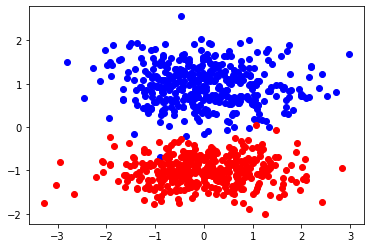

In [123]:
plt.scatter(pos_points['col1'],pos_points['col2'],color = 'b')
plt.scatter(neg_points['col1'],neg_points['col2'],color = 'r')
plt.show()

In [0]:
pos_points = pos_points.values
neg_points = neg_points.values

In [0]:
projected_pos_pts = np.dot(pos_points,wt_vector)
projected_neg_pts = np.dot(neg_points,wt_vector)

In [0]:
arrp = np.zeros((len(projected_pos_pts),1))
arrn = np.zeros((len(projected_neg_pts)))

Plotting the projected points in 1 Dimension

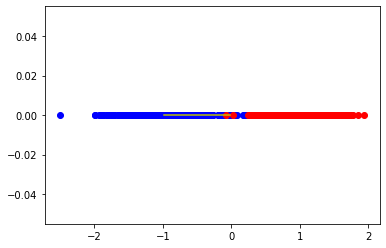

In [127]:
plt.scatter(projected_pos_pts,arrp,color = 'b')
plt.scatter(projected_neg_pts,arrn,color = 'r')
plt.plot(wt_vector,[0,0],'y')
plt.show()

In [0]:
final_pos_mean = projected_pos_pts.mean()
final_neg_mean = projected_neg_pts.mean()

In [0]:
final_pos_std = projected_pos_pts.std()
final_neg_std = projected_neg_pts.std()

Finds the intersection of the 2 normal curves, which will be the discriminant point for both the classes.

In [130]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = solve(final_pos_mean,final_neg_mean,final_pos_std,final_neg_std)
result = result[1]
result  #discriminant point which divides the positive and negative class points projected on the wt_vector

0.1570692199186924

Plotting the normal curve

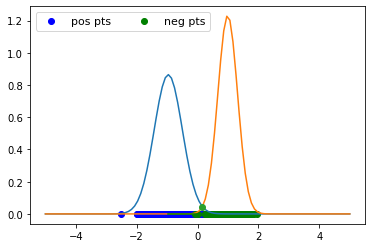

In [131]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((1,len(projected_pos_pts)))
ntemp = np.zeros((1,len(projected_neg_pts)))
plt.plot(x, norm.pdf(x, final_pos_mean, final_pos_std))
plt.plot(x,norm.pdf(x,final_neg_mean,final_neg_std))
plt.plot(result,norm.pdf(result,final_pos_mean,final_pos_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0],'g')
plt.legend((a,b),
           ('pos pts','neg pts'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=11)
plt.show()

##Evaluation

In [132]:
mean = test_data1.groupby('class').mean()
mean

,col1,col2
class,,
0,-0.044958,-0.987137
1,0.165402,0.998160


In [0]:
mean_vector = mean.iloc[0]-mean.iloc[1]

In [134]:
mean_vector

col1   -0.210360
col2   -1.985297
dtype: float64

In [0]:
points = test_data1.groupby('class')
pos_points = points.get_group(1)
neg_points =  points.get_group(0)
del pos_points['class']
del neg_points['class']

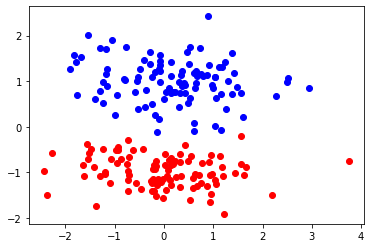

In [136]:
plt.scatter(pos_points['col1'],pos_points['col2'],color = 'b')
plt.scatter(neg_points['col1'],neg_points['col2'],color = 'r')
plt.show()

In [0]:
pos_points = pos_points.values
neg_points = neg_points.values

In [0]:
projected_pos_pts = np.dot(pos_points,wt_vector)
projected_neg_pts = np.dot(neg_points,wt_vector)

In [0]:
arrp = np.zeros((len(projected_pos_pts),1))
arrn = np.zeros((len(projected_neg_pts)))

Plotting the test points in 1D projected on the weight vector

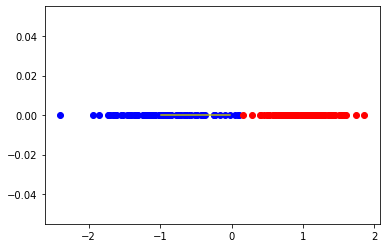

In [140]:
plt.scatter(projected_pos_pts,arrp,color = 'b')
plt.scatter(projected_neg_pts,arrn,color = 'r')
plt.plot(wt_vector,[0,0],'y')
plt.show()

In [0]:
final_pos_mean = projected_pos_pts.mean()
final_neg_mean = projected_neg_pts.mean()

In [0]:
final_pos_std = projected_pos_pts.std()
final_neg_std = projected_neg_pts.std()

Plotting the normal curve

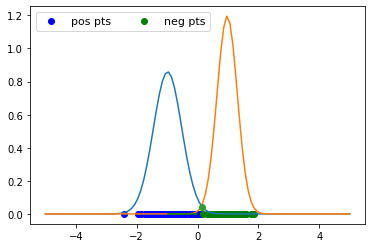

In [143]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((1,len(projected_pos_pts)))
ntemp = np.zeros((1,len(projected_neg_pts)))
plt.plot(x, norm.pdf(x, final_pos_mean, final_pos_std))
plt.plot(x,norm.pdf(x,final_neg_mean,final_neg_std))
plt.plot(result,norm.pdf(result,final_pos_mean,final_pos_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0],'g')
plt.legend((a,b),
           ('pos pts','neg pts'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=11)
plt.show()

In [0]:
pred_pos_dataset = pd.DataFrame(projected_pos_pts)
pred_neg_dataset = pd.DataFrame(projected_neg_pts)
# pred_pos_dataset['class']

In [145]:
pred_pos_dataset

,0
0,-1.076892
1,-1.241229
2,-0.245064
3,-1.317659
4,-1.115433
...,...
96,-0.978481
97,-1.340496
98,-1.714228
99,-1.730248


In [0]:
pred_pos_dataset = pred_pos_dataset.values

In [0]:
pred_neg_dataset = pred_neg_dataset.values

In [0]:
# ptemp is an array of zeros which will represent the predicted class for the positive pts.So, appended to the predicted positive dataset
ptemp = np.zeros((len(pred_pos_dataset),1))
ntemp = np.zeros((len(pred_neg_dataset),1))
pred_pos = np.append(pred_pos_dataset, ptemp, axis=1)
pred_neg = np.append(pred_neg_dataset, ntemp, axis=1)

In [0]:
tp=0 #true positive
tn=0 #true negative
fp=0 #false positive
fn=0 #false negative
for i in range(len(pred_pos_dataset)):
  if pred_pos[i,0]>=result:
    pred_pos[i,1] = 0
    fn+=1
  else:
    pred_pos[i,1] = 1
    tp+=1

for i in range(len(pred_neg_dataset)):
  if pred_neg[i,0]>=result:
    pred_neg[i,1] = 0
    tn+=1
  else:
    pred_neg[i,1] = 1
    fp+=1

In [150]:
test_accuracy = (tp+tn)/(tp+tn+fp+fn)
test_accuracy

1.0

In [151]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
precision

1.0

In [152]:
recall

1.0

In [153]:
f_score = 2*precision*recall/(precision+recall)
f_score

1.0

#2nd Data(Fischer in 3D)


##Preprocessing and Visualization

In [0]:
data_2 = pd.read_csv('/content/a1_d2.csv')

In [0]:
# data_2 = pd.read_csv('/gdrive/My Drive/a1_d2.csv')

In [156]:
data_2

,col1,col2,col3,class
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [157]:
#splitting using pandas
data2=data_2.sample(frac=0.8,random_state=1) #random state is a seed value
test_data2=data_2.drop(data2.index)
data2

,col1,col2,col3,class
507,0.705802,-0.331357,0.680021,1
818,2.236986,1.013989,-0.858430,0
452,3.590052,1.227587,-1.217510,0
368,1.005362,-0.062687,-1.216514,0
242,2.314154,1.318087,1.594990,1
...,...,...,...,...
199,4.403425,-0.811156,-0.803821,0
450,-0.208706,1.195454,-1.127270,0
137,-5.489007,-1.075608,0.731942,1
536,-3.345114,0.169668,1.107557,1


In [158]:
mean = data2.groupby('class').mean()
mean

,col1,col2,col3
class,,,
0,0.122108,0.098413,-1.004423
1,0.223301,-0.047107,1.012828


In [0]:
mean_vector = mean.iloc[0]-mean.iloc[1]

In [0]:
points = data2.groupby('class')
pos_points = points.get_group(1)
neg_points =  points.get_group(0)
del pos_points['class']
del neg_points['class']

In [0]:
pos_diff = pos_points - mean.iloc[1]
neg_diff = neg_points - mean.iloc[0]

In [0]:
pos_diff = pos_diff.values
neg_diff = neg_diff.values

In [0]:
N1 = len(pos_points)
N2 = len(neg_points)

In [0]:
sum_pos=np.zeros((3,3))
sum_neg=np.zeros((3,3))

for i in range(len(pos_diff)):
  sum_pos= np.dot(pos_diff[i].reshape(3,1),pos_diff[i].reshape(1,3)) + sum_pos
  sum_neg= np.dot(neg_diff[i].reshape(3,1),neg_diff[i].reshape(1,3)) + sum_neg


In [0]:
cov_matrix = sum_pos/N1 + sum_neg/N2

In [0]:
cov_inverse = np.linalg.inv(cov_matrix)

In [0]:
mean_vector = mean_vector.values

In [0]:
wt_vector = np.dot(cov_inverse,mean_vector)/(la.norm(cov_inverse)*la.norm(mean_vector))

In [169]:
wt_vector  # Final vector to which the points should be projected.

array([ 0.005938  ,  0.01997482, -0.99277946])

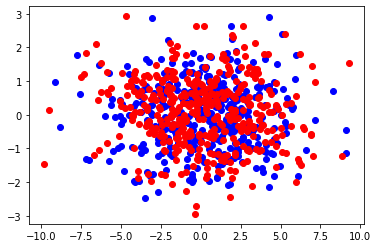

In [170]:
plt.scatter(pos_points['col1'],pos_points['col2'],color = 'b')
plt.scatter(neg_points['col1'],neg_points['col2'],color = 'r')
plt.show()

In [0]:
pos_points = pos_points.values
neg_points = neg_points.values

In [0]:
projected_pos_pts = np.dot(pos_points,wt_vector)
projected_neg_pts = np.dot(neg_points,wt_vector)


In [173]:
projected_neg_pts.shape

(403,)

In [0]:
arrp = np.zeros((len(projected_pos_pts),1))
arrn = np.zeros((len(projected_neg_pts)))

Plotting the projected data in 1D

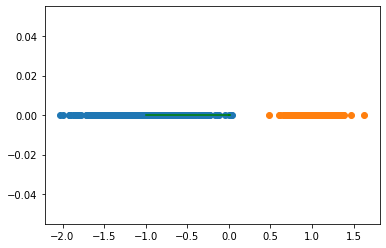

In [175]:
plt.scatter(projected_pos_pts,arrp)
plt.scatter(projected_neg_pts,arrn)
plt.plot(wt_vector,[0,0,0],'g')
plt.show()

In [0]:
final_pos_mean = projected_pos_pts.mean()
final_neg_mean = projected_neg_pts.mean()

In [0]:
final_pos_std = projected_pos_pts.std()
final_neg_std = projected_neg_pts.std()

Finding the intersection of 2 normal curves to obtain the discriminant point.

In [0]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = solve(final_pos_mean,final_neg_mean,final_pos_std,final_neg_std)
result = result[1]

In [179]:
result #discriminant point to separate both positive and negative classes

0.3773653658268285

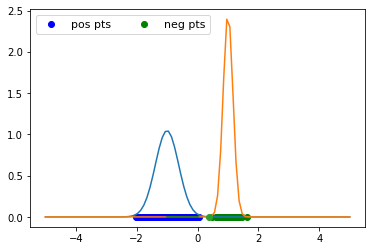

In [180]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((len(projected_pos_pts),1))
ntemp = np.zeros((len(projected_neg_pts),1))
plt.plot(x, norm.pdf(x, final_pos_mean, final_pos_std))
plt.plot(x,norm.pdf(x,final_neg_mean,final_neg_std))
plt.plot(result,norm.pdf(result,final_pos_mean,final_pos_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0,0],'g')
plt.legend((a,b),
           ('pos pts','neg pts'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=11)
plt.show()

##Evaluation

In [181]:
mean = test_data2.groupby('class').mean()
mean

,col1,col2,col3
class,,,
0,0.019977,0.123966,-1.008066
1,0.222341,0.193988,1.000414


In [0]:
mean_vector = mean.iloc[0]-mean.iloc[1]

In [183]:
mean_vector

col1   -0.202364
col2   -0.070022
col3   -2.008481
dtype: float64

In [0]:
points = test_data2.groupby('class')
pos_points = points.get_group(1)
neg_points =  points.get_group(0)
del pos_points['class']
del neg_points['class']

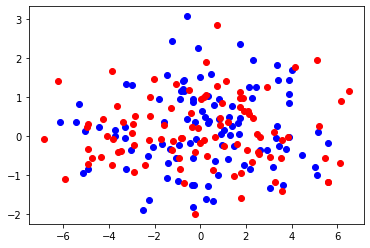

In [185]:
plt.scatter(pos_points['col1'],pos_points['col2'],color = 'b')
plt.scatter(neg_points['col1'],neg_points['col2'],color = 'r')
plt.show()

In [0]:
pos_points = pos_points.values
neg_points = neg_points.values

In [0]:
projected_pos_pts = np.dot(pos_points,wt_vector)
projected_neg_pts = np.dot(neg_points,wt_vector)

In [0]:
arrp = np.zeros((len(projected_pos_pts),1))
arrn = np.zeros((len(projected_neg_pts)))

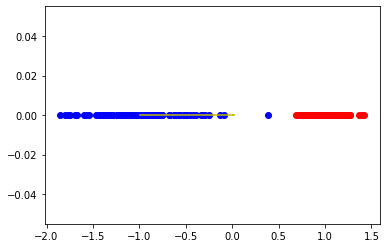

In [189]:
plt.scatter(projected_pos_pts,arrp,color = 'b')
plt.scatter(projected_neg_pts,arrn,color = 'r')
plt.plot(wt_vector,[0,0,0],'y')
plt.show()

In [0]:
final_pos_mean = projected_pos_pts.mean()
final_neg_mean = projected_neg_pts.mean()

In [0]:
final_pos_std = projected_pos_pts.std()
final_neg_std = projected_neg_pts.std()

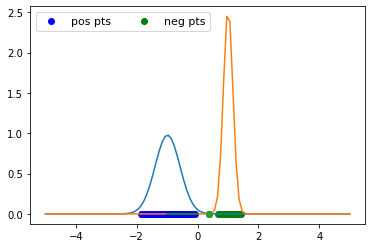

In [192]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((1,len(projected_pos_pts)))
ntemp = np.zeros((1,len(projected_neg_pts)))
plt.plot(x, norm.pdf(x, final_pos_mean, final_pos_std))
plt.plot(x,norm.pdf(x,final_neg_mean,final_neg_std))
plt.plot(result,norm.pdf(result,final_pos_mean,final_pos_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0,0],'g')
plt.legend((a,b),
           ('pos pts','neg pts'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=11)
plt.show()

In [0]:
pred_pos_dataset = pd.DataFrame(projected_pos_pts)
pred_neg_dataset = pd.DataFrame(projected_neg_pts)

In [194]:
pred_pos_dataset

,0
0,-1.390250
1,-1.342429
2,-0.611742
3,-0.458885
4,-0.135250
...,...
98,-1.297438
99,-1.385204
100,-1.162175
101,-1.597710


In [0]:
pred_pos_dataset = pred_pos_dataset.values

In [0]:
pred_neg_dataset = pred_neg_dataset.values

In [0]:
# ptemp is an array of zeros which will represent the predicted class for the positive pts.So, appended to the predicted positive dataset
ptemp = np.zeros((len(pred_pos_dataset),1))
ntemp = np.zeros((len(pred_neg_dataset),1))
pred_pos = np.append(pred_pos_dataset, ptemp, axis=1)
pred_neg = np.append(pred_neg_dataset, ntemp, axis=1)

In [0]:
tp=0 #true positive
tn=0 #true negative
fp=0 #false positive
fn=0 #false negative
for i in range(len(pred_pos_dataset)):
  if pred_pos[i,0]>=result:
    pred_pos[i,1] = 0
    fn+=1
  else:
    pred_pos[i,1] = 1
    tp+=1

for i in range(len(pred_neg_dataset)):
  if pred_neg[i,0]>=result:
    pred_neg[i,1] = 0
    tn+=1
  else:
    pred_neg[i,1] = 1
    fp+=1

In [199]:
test_accuracy = (tp+tn)/(tp+tn+fp+fn)
test_accuracy

0.995

In [200]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
precision

1.0

In [201]:
recall

0.9902912621359223

In [202]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.9951219512195122